## TASK-1

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv("fisher_discriminant_data.csv")
data

,Feature A,Feature B,Class
0,0.272207,1.672364,0
1,0.031941,3.272835,0
2,0.871286,0.894008,0
3,1.252878,2.101521,0
4,1.884091,3.294689,0
...,...,...,...
95,8.576763,9.843814,1
96,7.636013,7.467920,1
97,6.393543,7.221997,1
98,5.567265,7.390769,1


In [80]:
data.Class.unique()

array([0, 1])

In [81]:
data.shape

(100, 3)

There are two classes in given data - 0 and 1

In [82]:
class_0_data = data.query('Class == 0')
class_1_data = data.query('Class == 1')

Initial Data


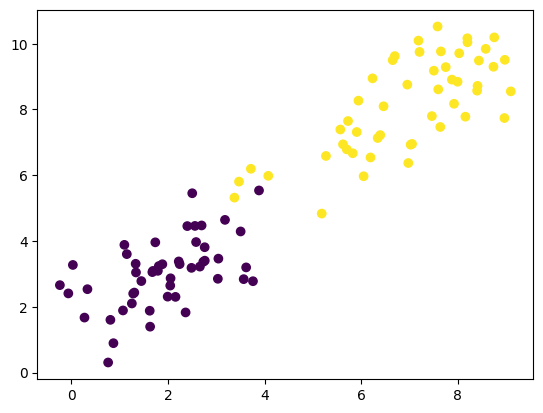

In [83]:
print("Initial Data")
Y = data["Class"].to_numpy()
plt.scatter(data["Feature A"].to_numpy(),data["Feature B"].to_numpy(),c=Y)

In [93]:
X = data.drop(["Class"],axis=1).to_numpy()

In [94]:
X_0 = class_0_data.drop(["Class"],axis=1).to_numpy()
X_1 = class_1_data.drop(["Class"],axis=1).to_numpy()

In [95]:
#finding mean of each class

mean_0 = np.mean(X_0,axis = 0)
cov_0 = np.transpose(X_0)@X_0
mean_1 = np.mean(X_1,axis = 0)
cov_1 = np.transpose(X_1)@X_1

In [96]:
#within class scatter matrix
s_0 = np.zeros((2,2)) #since there are 2 classes
s_1 = np.zeros((2,2)) #since there are 2 classes
for i in range(X_0.shape[0]): 
    s_0 += np.outer((X_0[i]-mean_0),(X_0[i]-mean_0)) 

for i in range(X_1.shape[0]): 
    s_1 += np.outer((X_1[i]-mean_1),(X_1[i]-mean_1))

SW = s_0 + s_1

In [97]:
#Between scatter matrix
SB = np.outer((mean_0 - mean_1),(mean_0 - mean_1))

In [127]:
W = np.linalg.inv(SW)@SB
U,S,V = np.linalg.svd(W)

In [128]:
eigen = U[:,0]#for 1-dimensional projection

In [101]:
projected_data = X@eigen

In [122]:
final_data= {'X': projected_data, 'Y': Y}

f_data = pd.DataFrame(data=final_data)

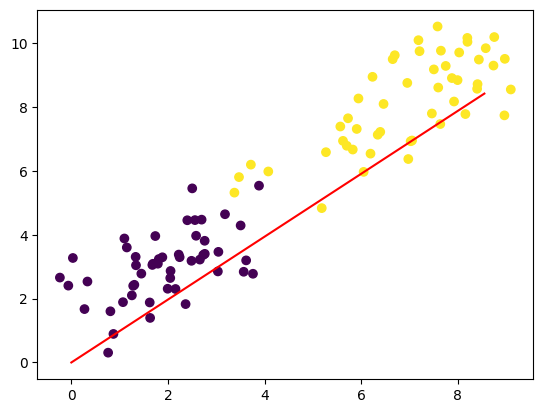

In [231]:
Y = data["Class"].to_numpy()

plt.plot([0,-eigen[0]*12],[0,-eigen[1]*12],color = "red")
plt.scatter(data["Feature A"].to_numpy(),data["Feature B"].to_numpy(),c=Y)

Final Data


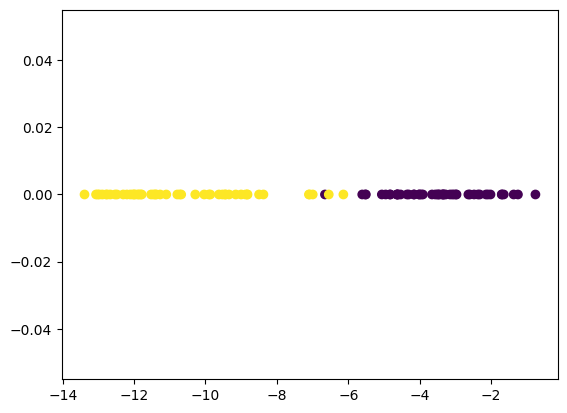

In [113]:
print("Final Data")
const = np.zeros(projected_data.shape)
plt.plot(f_data["X"].to_numpy(),const,c=f_data["Y"].to_numpy())

## TASK-2

In [137]:
from PIL import Image

Original Image


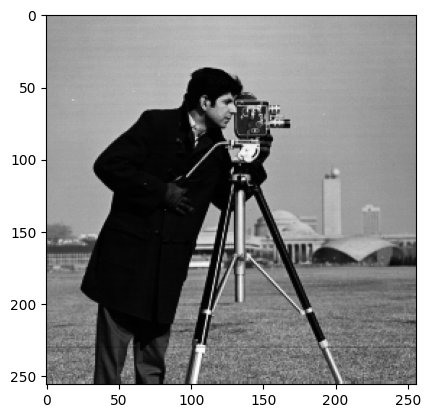

In [208]:
img = Image.open('cameraman.tif')
img = np.asarray(img)

print("Original Image")
plt.imshow(img,cmap="gray")

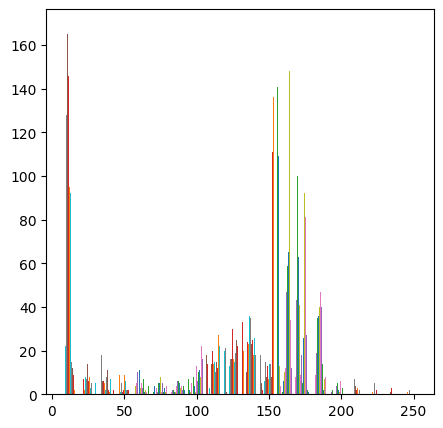

In [209]:
fig, ax = plt.subplots(figsize =(5,5))
ax.hist(img,bins = 20)
plt.show()

In [210]:
bin = 256

hist,bins = np.histogram(img,bins = bin)

bin_mid = (bins[:-1]+bins[1:])/2

w1 = np.cumsum(hist)
w2 = np.cumsum(hist[::-1])[::-1]

m1 = np.cumsum(hist*bin_mid)/w1
m2 = (np.cumsum((hist*bin_mid)[::-1])/w2[::-1])[::-1]

inter_cv = w1[:-1]*w2[1:]*(m1[:-1] - m2[1:])**2

max_ind = np.argmax(inter_cv)

thresh = bin_mid[:-1][max_ind]

thresh

88.19921875

In [211]:
bin_img = np.where(img > thresh,255,0).astype(np.uint8)


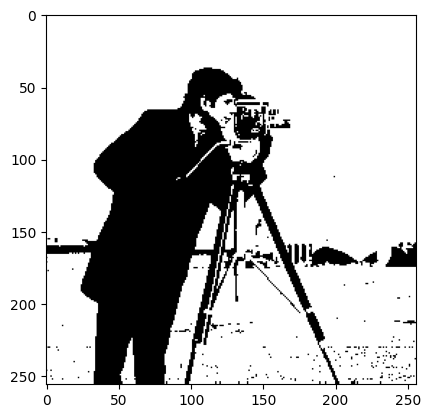

In [212]:
plt.imshow(bin_img,cmap="gray")